# SetUp

In [1]:
# Modules used
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# File Paths and Settings
csv_path = "src-gen"  # relative path to the folder, where the csv files are located
aircraft_csv_path = os.path.join(csv_path, "Aircraft.csv")
pilot_csv_path = os.path.join(csv_path, "Pilot.csv")
atc_csv_path = os.path.join(csv_path, "AirTrafficController.csv")

# Analyzing Aircraft.csv

In [3]:
# General SetUp
col_not_for_plot = ["Tick", "Step", "0_Position", "1_Position", "ID", "Latitude", "Longitude", "Aircraft__callsign", "DateTime"]

In [4]:
with open(aircraft_csv_path, encoding='utf-8-sig') as file:
    df_aircraft = pd.read_csv(file, sep=";")
df_aircraft.head()

,Tick,Step,DateTime,Aircraft__acceleration_x,Aircraft__acceleration_z,Aircraft__angle_of_attack,Aircraft__callsign,Aircraft__climb_angle,Aircraft__drag,Aircraft__drag_coefficient,...,LWT__fuel_quantity,LWT__water_sediments,Propeller__thrust,Propeller__thrust_coefficient,RWT__fuel_quantity,RWT__water_sediments,Tire__friction_force,0_Position,1_Position,ID
0,0,0,2020-01-01T19:00:00.0000000+01:00,0.0,0.0,0.0,Cessna2,0.0,0.0,0.0,...,43.0,True,0.0,0.0,41.0,True,0.0,"9,4","53,4",81c41932-f15a-4ae6-b764-f4882484131d
1,0,0,2020-01-01T19:00:00.0000000+01:00,0.0,0.0,0.0,Cessna1,0.0,0.0,0.0,...,22.0,False,0.0,0.0,45.0,False,0.0,"9,4","53,4",46814bf0-b0b0-4778-8d43-55ad9adf8871
2,1,1,2020-01-01T19:00:01.0000000+01:00,0.0,0.0,0.0,Cessna2,0.0,0.0,0.0,...,43.0,True,0.0,0.0,41.0,True,0.0,"9,4","53,4",81c41932-f15a-4ae6-b764-f4882484131d
3,1,1,2020-01-01T19:00:01.0000000+01:00,0.0,0.0,0.0,Cessna1,0.0,0.0,0.0,...,22.0,False,0.0,0.0,45.0,False,0.0,"9,4","53,4",46814bf0-b0b0-4778-8d43-55ad9adf8871
4,2,2,2020-01-01T19:00:02.0000000+01:00,0.0,0.0,0.0,Cessna2,0.0,0.0,0.0,...,43.0,True,0.0,0.0,41.0,True,0.0,"9,4","53,4",81c41932-f15a-4ae6-b764-f4882484131d


In [5]:
#Generate List with column names
cols_to_plot = list(set(df_aircraft.columns)^set(col_not_for_plot))
cols_to_plot = sorted(cols_to_plot)
cols_to_plot

['Aircraft__acceleration_x',
 'Aircraft__acceleration_z',
 'Aircraft__angle_of_attack',
 'Aircraft__climb_angle',
 'Aircraft__drag',
 'Aircraft__drag_coefficient',
 'Aircraft__flight_phase',
 'Aircraft__ground_speed_x',
 'Aircraft__heading_bearing',
 'Aircraft__height',
 'Aircraft__lift',
 'Aircraft__lift_coefficient',
 'Aircraft__pitch',
 'Aircraft__rate_of_climb',
 'Aircraft__true_air_speed',
 'Aircraft__true_air_speed_x',
 'Brake__deceleration_application',
 'Brake__deceleration_force',
 'Brake__parking_brake',
 'CIP__master_switch',
 'Engine__RPM',
 'Engine__failure',
 'Engine__failure_probability',
 'Engine__fuel_consumption',
 'Engine__ignition_switch',
 'Engine__mixture_control',
 'Engine__oil',
 'Engine__oil_leakage',
 'Engine__oil_pressure',
 'Engine__oil_pump_condition',
 'Engine__oil_temperature',
 'Engine__power',
 'Engine__running',
 'Engine__throttle',
 'LWT__fuel_quantity',
 'LWT__water_sediments',
 'Propeller__thrust',
 'Propeller__thrust_coefficient',
 'RWT__fuel_quant

## Plot of all procuded Signals from Aircraft

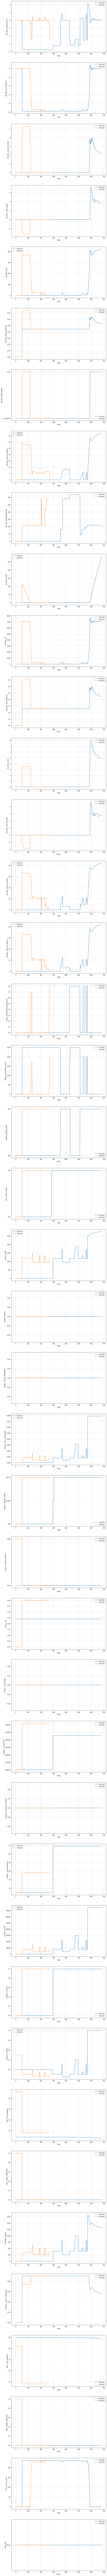

In [6]:
fig, axs = plt.subplots(len(cols_to_plot), figsize=(12, 8*len(cols_to_plot)))
df_grouped_aircraft = df_aircraft.groupby('Aircraft__callsign')

for count, col in enumerate(cols_to_plot):
    for key, group in df_grouped_aircraft:
        axs[count].plot(group["Step"], group[col], label = key)
        axs[count].set(xlabel = "Step", ylabel = col)
        axs[count].legend()
        axs[count].grid(linestyle='-', linewidth=0.5)

## Plot of Latitude, Longitude and height

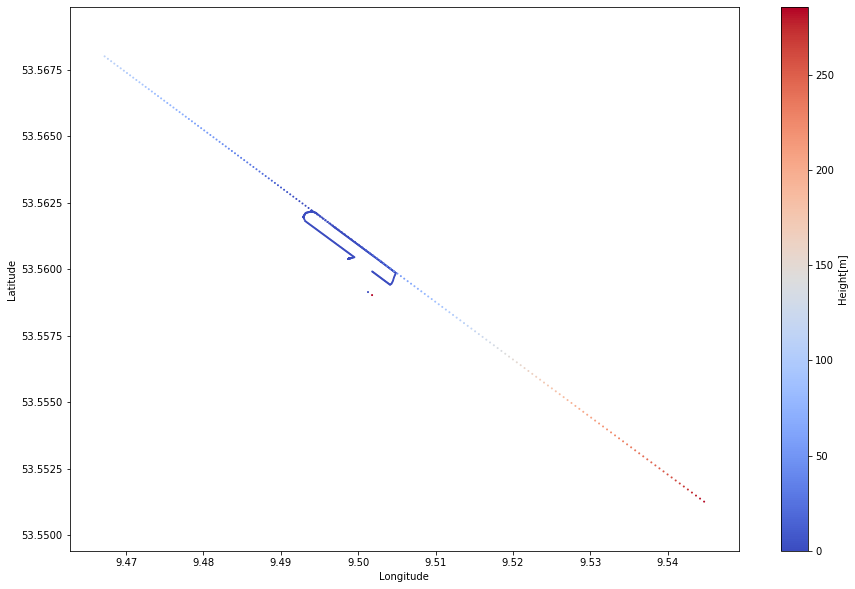

In [7]:
# Only useful with one aircraft so far
df_aircraft_c = df_aircraft[df_aircraft["Longitude"] != 9.4] # filter out default values
fig = plt.figure(figsize=(15, 10))
ax = plt.scatter(df_aircraft_c["Longitude"], df_aircraft_c["Latitude"],s=1, c=df_aircraft_c["Aircraft__height"], cmap=plt.cm.coolwarm)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
cb = plt.colorbar(ax)
cb.set_label('Height[m]')

# Analyzing Pilot.csv

In [8]:
with open(pilot_csv_path, encoding='utf-8-sig') as file:
    df_pilot = pd.read_csv(file, sep=";")
df_pilot.head()

,Tick,Step,DateTime,age,current_activity,event_info,flight_experience,Latitude,Longitude,myAircraft_callsign,state,takeoff_distance,0_Position,1_Position,ID
0,0,0,2020-01-01T19:00:00.0000000+01:00,20,Initialization,None,119.696633,53.4,9.4,Cessna2,Initialization,0.0,"9,4","53,4",b1ccaf7f-db4f-49ca-9d24-713c7397ecb6
1,0,0,2020-01-01T19:00:00.0000000+01:00,33,Initialization,None,810.886049,53.4,9.4,Cessna1,Initialization,0.0,"9,4","53,4",746005f9-ab8c-4197-bd53-cfad64c3a510
2,1,1,2020-01-01T19:00:01.0000000+01:00,20,Initialization,None,119.696633,53.4,9.4,Cessna2,Initialization,0.0,"9,4","53,4",b1ccaf7f-db4f-49ca-9d24-713c7397ecb6
3,1,1,2020-01-01T19:00:01.0000000+01:00,33,Initialization,None,810.886049,53.4,9.4,Cessna1,Initialization,0.0,"9,4","53,4",746005f9-ab8c-4197-bd53-cfad64c3a510
4,2,2,2020-01-01T19:00:02.0000000+01:00,20,Initialization,None,119.696633,53.4,9.4,Cessna2,Initialization,0.0,"9,4","53,4",b1ccaf7f-db4f-49ca-9d24-713c7397ecb6


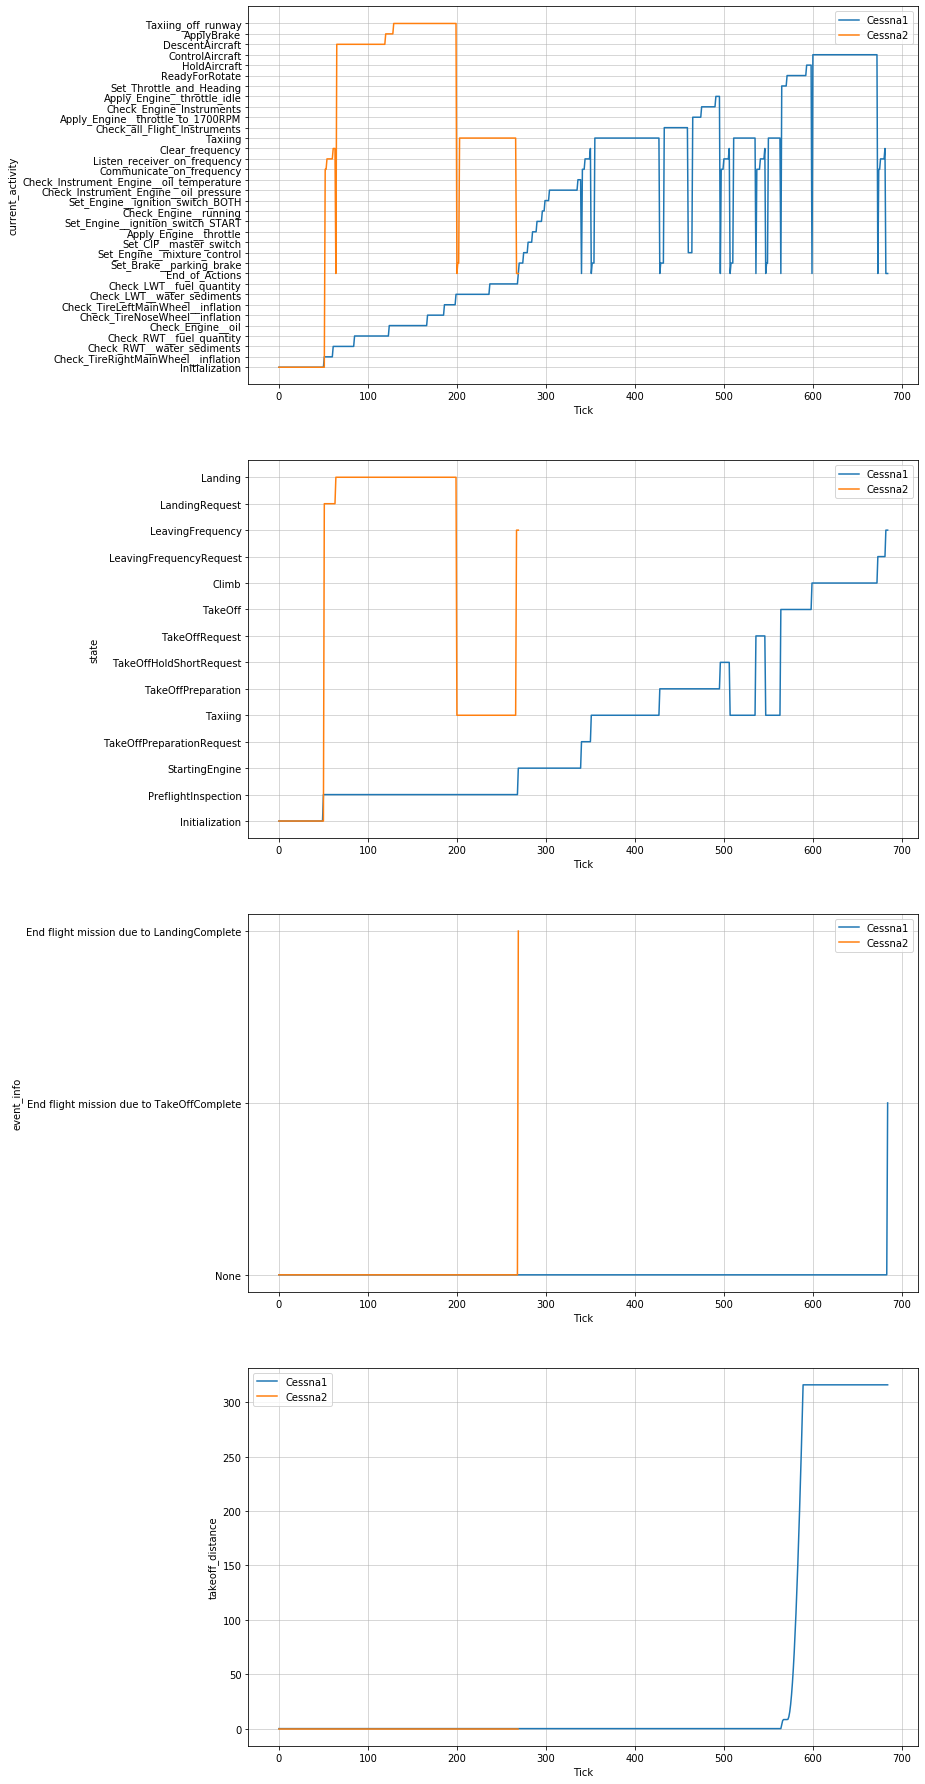

In [9]:
cols_to_plot2 = ["current_activity", "state", "event_info", "takeoff_distance"]
df_grouped_pilot = df_pilot.groupby('myAircraft_callsign')

fig, axs = plt.subplots(len(cols_to_plot2), figsize=(12, 8*len(cols_to_plot2)))

for count, col in enumerate(cols_to_plot2):
    for key, group in df_grouped_pilot:
        axs[count].plot(group["Tick"], group[col], label = key)
        axs[count].set(xlabel = "Tick", ylabel = col)
        axs[count].legend()
        axs[count].grid(linestyle='-', linewidth=0.5)

# Analyzing AirTrafficController.csv

In [10]:
with open(atc_csv_path, encoding='utf-8-sig') as file:
    df_atc = pd.read_csv(file, sep=";")
df_atc.head()

,Tick,Step,DateTime,callsign_received,identifier,message_type_received,runway_heading_calculated,state,0_Position,1_Position,ID
0,0,0,2020-01-01T19:00:00.0000000+01:00,None,Tower,None,0,Listen_on_frequency,"9,501334","53,559712",33d37f6a-fb5e-4bfe-a4e5-d2f11c48d43f
1,1,1,2020-01-01T19:00:01.0000000+01:00,None,Tower,None,0,Listen_on_frequency,"9,501334","53,559712",33d37f6a-fb5e-4bfe-a4e5-d2f11c48d43f
2,2,2,2020-01-01T19:00:02.0000000+01:00,None,Tower,None,0,Listen_on_frequency,"9,501334","53,559712",33d37f6a-fb5e-4bfe-a4e5-d2f11c48d43f
3,3,3,2020-01-01T19:00:03.0000000+01:00,None,Tower,None,0,Listen_on_frequency,"9,501334","53,559712",33d37f6a-fb5e-4bfe-a4e5-d2f11c48d43f
4,4,4,2020-01-01T19:00:04.0000000+01:00,None,Tower,None,0,Listen_on_frequency,"9,501334","53,559712",33d37f6a-fb5e-4bfe-a4e5-d2f11c48d43f


In [11]:
cols_to_plot3 = ["callsign_received", "state", "message_type_received"]
df_atc = df_atc.replace(np.nan, 'None', regex=True)
#df_atc.head()

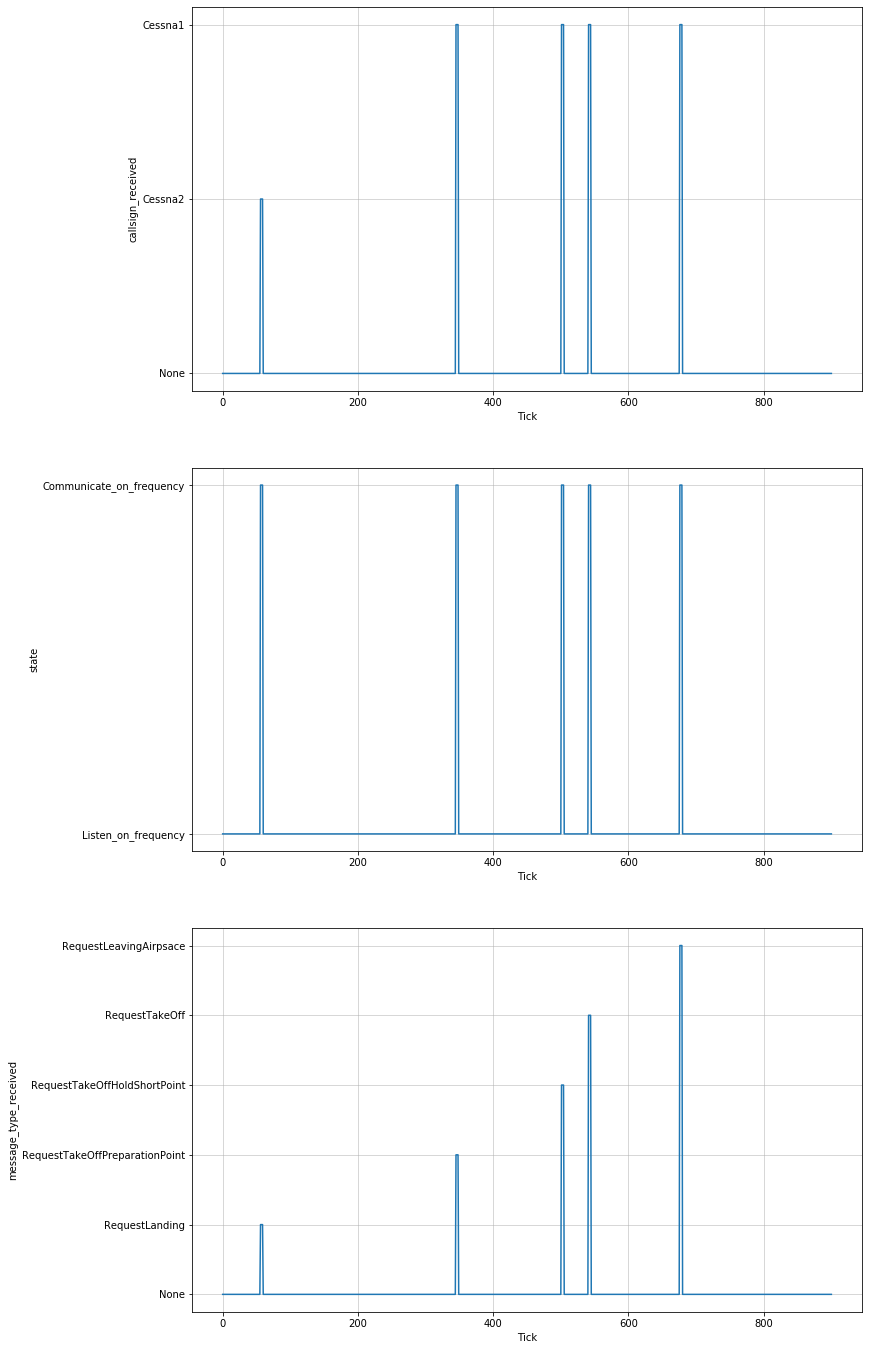

In [12]:
fig, axs = plt.subplots(len(cols_to_plot3), figsize=(12, 8*len(cols_to_plot3)))

for count, col in enumerate(cols_to_plot3):
    axs[count].plot(df_atc["Tick"], df_atc[col])
    axs[count].set(xlabel = "Tick", ylabel = col)
    axs[count].grid(linestyle='-', linewidth=0.5)